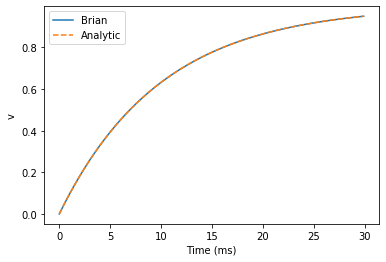

In [16]:
from brian2 import *
%matplotlib inline
#10*nA*5*Mohm

start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, method='exact')
#print('Before v = %s' % G.v[0])
#run(100*ms)
#print('After v = %s' % G.v[0])
#print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

M = StateMonitor(G, 'v', record=0) #record=0 -> only record the neuron 0

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian') #C0 -> color
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--', label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend();


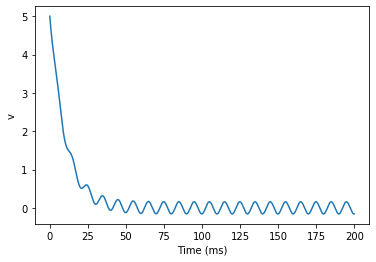

In [18]:
from brian2 import *
%matplotlib inline
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = 5 # initial value

run(200*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

Spike times: [16.  31.1 46.2] ms


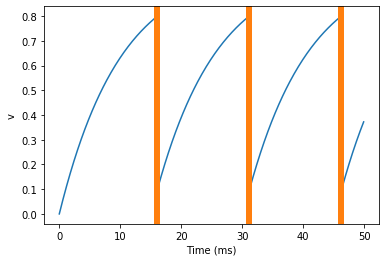

In [29]:
from brian2 import *
%matplotlib inline
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0.1', method='exact')

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)
run(50*ms)
plot(M.t/ms, M.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='-', c='C1', lw=6)
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])



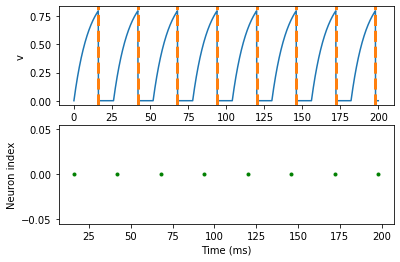

In [45]:
from brian2 import *
%matplotlib inline
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=10*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(200*ms)

subplot(211)
plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

subplot(212)
plot(spikemon.t/ms, spikemon.i, '.g')
xlabel('Time (ms)')
ylabel('Neuron index');

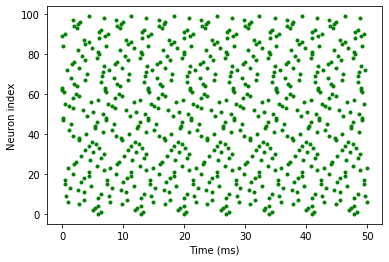

In [35]:
from brian2 import *
%matplotlib inline
start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.g')
xlabel('Time (ms)')
ylabel('Neuron index');

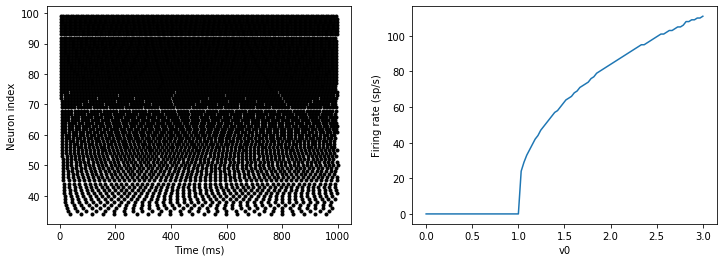

In [49]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration) # M is an array of the number of spikes each neuron in the group fired. Dividing this by the duration of the run gives the firing rate.
xlabel('v0')
ylabel('Firing rate (sp/s)');

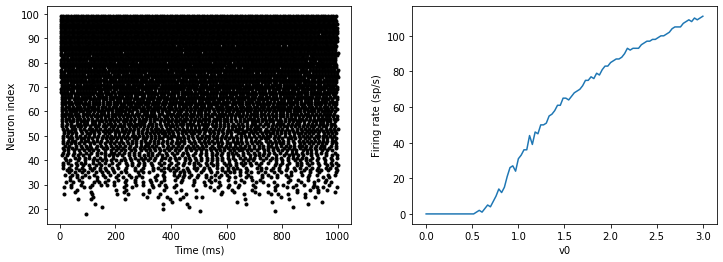

In [51]:
'''
Often when making models of neurons, we include a random element to model the effect of various
forms of neural noise. In Brian, we can do this by using the symbol xi in differential equations.
Strictly speaking, this symbol is a “stochastic differential” but you can sort of thinking of it as
just a Gaussian random variable with mean 0 and standard deviation 1. We do have to take into account
the way stochastic differentials scale with time, which is why we multiply it by tau**-0.5 in the
equations below
'''

start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');